<a href="https://colab.research.google.com/github/archivesunleashed/notebooks/blob/main/arch/arch_image_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Information Dataset Exploration

We're going to take a look at a few examples of how we can explore the Image Information dataset. 

The first thing we need to do is enter the URL for our Image Information dataset in the cell below. You can get this by right clicking the Download icon, and selecting "Copy Link".

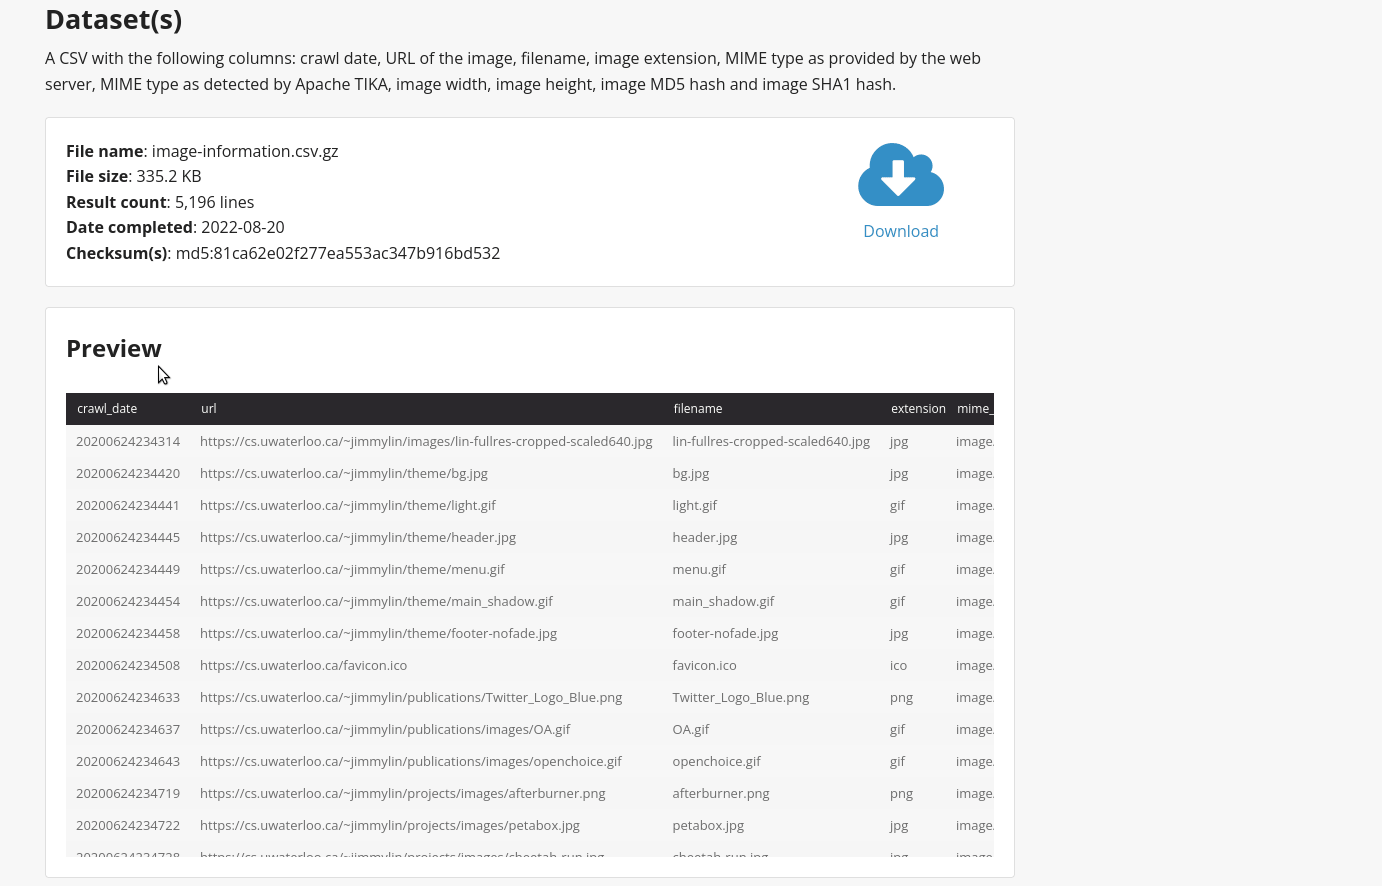

In [ ]:
dataset = 'https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14462/ImageInformationExtraction/image-information.csv.gz?access=FIRYZQPIJQCZFRCASNMYRA7SJCS5XSRR' #@param {type:"string"}
print(dataset)

https://webdata.archive-it.org/ait/files/download/ARCHIVEIT-14462/ImageInformationExtraction/image-information.csv.gz?access=FIRYZQPIJQCZFRCASNMYRA7SJCS5XSRR


## pandas

Next, we'll setup our environment so we can load our Image Information dataset into [pandas](https://pandas.pydata.org) DataFrames. If you're unfamiliar with DataFrames, but you're worked with spreadsheets before, you should feel comfortable pretty quick.

In [ ]:
import pandas as pd

## Data Table Display

Colab includes an extension that renders pandas DataFrames into interactive displays that can be filtered, sorted, and explored dynamically. This can be very useful for taking a look at what each DataFrame provides, and doing some intital filtering!

Data table display for pandas dataframes can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

In [ ]:
%load_ext google.colab.data_table

## Loading our ARCH Dataset as a DataFrame

---


Next, we'll create pandas DataFrame from our dataset, and show a preview of it using the Data Table Display.

In [ ]:
images = pd.read_csv(dataset, compression='gzip')
images

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,width,height,md5,sha1
0,20200624234314,https://cs.uwaterloo.ca/~jimmylin/images/lin-f...,lin-fullres-cropped-scaled640.jpg,jpg,image/jpeg,image/jpeg,640,640,84cc71a62c3b17c3606485b286b34f3b,47f3f2de944788d430f00743d7bf45be498b8042
1,20200624234420,https://cs.uwaterloo.ca/~jimmylin/theme/bg.jpg,bg.jpg,jpg,image/jpeg,image/jpeg,36,648,b6db5db821a62c0f32e44777014a8ddd,277d3b105fa3f177c6354a5edbcc6154f7d4f092
2,20200624234441,https://cs.uwaterloo.ca/~jimmylin/theme/light.gif,light.gif,gif,image/gif,image/gif,1148,600,00daeb1b3b1ab0011fd8439456bd389a,ea3ffcd50a13afefc83b6f38e98cf7be71c604fa
3,20200624234445,https://cs.uwaterloo.ca/~jimmylin/theme/header...,header.jpg,jpg,image/jpeg,image/jpeg,936,90,42e24b7365f5968eca768a0fdf44d0d6,5a6b6d8150e27746d612e38620c611a9b59c9f19
4,20200624234449,https://cs.uwaterloo.ca/~jimmylin/theme/menu.gif,menu.gif,gif,image/gif,image/gif,400,186,e74b7d7040bcdf3a3bc2b7e27839c542,e4a10fc674f1b9f8e636bb888c54c84dfcf5940b
...,...,...,...,...,...,...,...,...,...,...
5363,20220724212732,https://ruebot.net/music/just-desserts/feature...,featured_hu71423de9786c175acd8020494c8fb6ea_41...,jpg,image/jpeg,image/jpeg,550,550,0ffad0de3ff95f08827766570da0db9b,fd0b0f439bcc3b2c136bc67f2820505e62365e0d
5364,20220724212655,https://miro.medium.com/fit/c/224/224/0*DMGeIy...,0*DMGeIyQDUr2sKW7u,png,image/png,image/png,224,223,7a2e4bf0be37b113cee37c920a962db7,4450ccf31aa538108d6bd1ab973ac47e10f684e1
5365,20220724212658,https://miro.medium.com/fit/c/112/112/0*DMGeIy...,0*DMGeIyQDUr2sKW7u,png,image/png,image/png,112,111,2cbe929a71fbdf79819a638860965948,5dee53ef35e3a64db38da3cdf19d399a87c5c658
5366,20220724212728,https://miro.medium.com/fit/c/56/56/1*TBrp2d0M...,1*TBrp2d0MFei_DVMDVdbYig.png,png,image/png,image/png,56,55,852b089b7e7d57df87ad56b2df92013a,1716484e122e4aa25c7de81e2c44ec745617d797


# Data Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

## Counting total files, and unique files

Let's take a quick look at how to count items in DataFrames, and use total and unique files as an example to work with.

It's definitely work checking out the [pandas documentation](https://pandas.pydata.org/docs/index.html). There are a lot of good examples available, along with a robust [API reference](https://pandas.pydata.org/docs/reference/index.html#api).


### How many images are in this collection?

We can take our `images` variable try a couple of functions to get the same answer.

1.   `len(images.index)`
  * Get the length of the DataFrame's index.
2.   `images.shape[0]`
  * Get the shape or dimensionality of the DataFrame, and take the first item in the tuple.
3.  `images.count()`
  * Count the number of rows for each column.



In [ ]:
len(images.index)

5368

In [ ]:
images.shape[0]

5368

In [ ]:
images.count()

crawl_date              5368
url                     5368
filename                5318
extension               5368
mime_type_web_server    5368
mime_type_tika          5368
width                   5368
height                  5368
md5                     5368
sha1                    5368
dtype: int64

### How many unique images are in the collection?

 We can see if an image is unique or not by computing an [MD5 hash](https://en.wikipedia.org/wiki/MD5#MD5_hashes) of it, and comparing them. The exact same image might have a filename of `example.jpg` or `foo.jpg`. If the hash is computed for each, we can see that even with different file names, they are actually the same image. So, since we have both a `MD5` and `SHA1` hash column available in our DataFrame, we can just find the unique values, and count them!




In [ ]:
len(images.md5.unique())

3267

### What are the top 10 most occurring images in the collection?

Here we can take advantage of [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) to provide us with a list of MD5 hashes, and their respective counts.

In [ ]:
images["md5"].value_counts().head(10)

ad4b0f606e0f8465bc4c4c170b37e1a3    50
325472601571f31e1bf00674c368d335    20
683f3c2314295475e95ab663eeb29f3f    19
753c1f48f6c232c4f66359850dd38e72    11
c37d6a8412f30dcdef54a802fd4e09f7    11
3afb78b6b24a1fb4dd3b7247c2c1fbf0    11
a5b8e9cbe5c11f480b2f73e657731fff    11
2e0540cb61c4bd2ca9201c95e6e7c74c    11
2f93cd614e3a1bc4b2149a26877f4b88    10
a4c1e27ea39ea62ede66f74b891d5976    10
Name: md5, dtype: int64


### What's the information around all of the occurances of `ad4b0f606e0f8465bc4c4c170b37e1a3`?

What, you mean you don't know what `ad4b0f606e0f8465bc4c4c170b37e1a3` means? 

Let's find those images in the DataFrame. We can here see some of the filenames used, it's dimensions, and it's URL.


In [ ]:
images.loc[images["md5"] == "ad4b0f606e0f8465bc4c4c170b37e1a3"]

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,width,height,md5,sha1
311,20200808191119,https://srv-2020-08-08-19.pixel.parsely.com/pl...,NaN,gif,image/gif,image/gif,1,1,ad4b0f606e0f8465bc4c4c170b37e1a3,50b30fd5f87c85fe5cba2635cb83316ca71250d7
1666,20200910033544,https://srv-2020-09-10-03.pixel.parsely.com/pl...,NaN,gif,image/gif,image/gif,1,1,ad4b0f606e0f8465bc4c4c170b37e1a3,50b30fd5f87c85fe5cba2635cb83316ca71250d7
1676,20200910033547,https://srv-2020-09-10-03.pixel.parsely.com/pl...,NaN,gif,image/gif,image/gif,1,1,ad4b0f606e0f8465bc4c4c170b37e1a3,50b30fd5f87c85fe5cba2635cb83316ca71250d7
2655,20200910205815,https://srv-2020-09-10-20.pixel.parsely.com/pl...,NaN,gif,image/gif,image/gif,1,1,ad4b0f606e0f8465bc4c4c170b37e1a3,50b30fd5f87c85fe5cba2635cb83316ca71250d7
2678,20200910205845,https://srv-2020-09-10-20.pixel.parsely.com/pl...,NaN,gif,image/gif,image/gif,1,1,ad4b0f606e0f8465bc4c4c170b37e1a3,50b30fd5f87c85fe5cba2635cb83316ca71250d7
2686,20200910210114,https://srv-2020-09-10-20.pixel.parsely.com/pl...,NaN,gif,image/gif,image/gif,1,1,ad4b0f606e0f8465bc4c4c170b37e1a3,50b30fd5f87c85fe5cba2635cb83316ca71250d7
2694,20200910210356,https://srv-2020-09-10-21.pixel.parsely.com/pl...,NaN,gif,image/gif,image/gif,1,1,ad4b0f606e0f8465bc4c4c170b37e1a3,50b30fd5f87c85fe5cba2635cb83316ca71250d7
2702,20200910210406,https://srv-2020-09-10-21.pixel.parsely.com/pl...,NaN,gif,image/gif,image/gif,1,1,ad4b0f606e0f8465bc4c4c170b37e1a3,50b30fd5f87c85fe5cba2635cb83316ca71250d7
2704,20200910210637,https://srv-2020-09-10-21.pixel.parsely.com/pl...,NaN,gif,image/gif,image/gif,1,1,ad4b0f606e0f8465bc4c4c170b37e1a3,50b30fd5f87c85fe5cba2635cb83316ca71250d7
2706,20200910210659,https://srv-2020-09-10-21.pixel.parsely.com/pl...,NaN,gif,image/gif,image/gif,1,1,ad4b0f606e0f8465bc4c4c170b37e1a3,50b30fd5f87c85fe5cba2635cb83316ca71250d7


### What does `ad4b0f606e0f8465bc4c4c170b37e1a3` look like?

Let's grab the live web URL for the image, and then see if we can display it in a markdown cell.


In [ ]:
pd.options.display.max_colwidth = None
one_image = images.loc[images["md5"] == "ad4b0f606e0f8465bc4c4c170b37e1a3"].head(1)
one_image["url"]

311    https://srv-2020-08-08-19.pixel.parsely.com/plogger/?rand=1596913842241&plid=95640210&idsite=medium.com&url=https%3A%2F%2Fnews.archivesunleashed.org%2F&urlref=&screen=1600x1000%7C1600x1000%7C24&data=%7B%22f4a%22%3A%22visitor%22%7D&sid=1&surl=https%3A%2F%2Fnews.archivesunleashed.org%2F%3Fgi%3Dc99e6eda4d42&sref=&sts=1596913838633&slts=0&title=Archives+Unleashed&date=Sat+Aug+08+2020+19%3A10%3A42+GMT%2B0000+(Coordinated+Universal+Time)&action=pageview&js=1&pvid=33374489&u=pid%3D7e0700dfc569a10021c1ba8157db9a36
Name: url, dtype: object

Unfortunately, we can't easily display it here since it is a tracker pixel file. 

While we can see that this is the most popular image in the collection, we can't tell you _why_. That's where the researcher comes in!

...though this is a tracker pixel, so something along the lines of money, greed, and power is probably the real reason it's the most popular image!



Another point of examination with the `images` DataFrame is the `height` and `width` columns. You could take a look at the largest images, or even `0x0` images, and potentially `spacer.gif` occurrences!

* “[The invention and dissemination of the spacer gif: implications for the future of access and use of web archives](https://link.springer.com/article/10.1007/s42803-019-00006-8)”
* "[GeoCities and the spacer.gif](https://ruebot.net/post/geocities-and-the-spacer-gif/)"


### What are the top 10 most occuring filenames in the collection?

Note that this is of course different than the MD5 results up above. Here we are focusing _just_ on filename. So `cover.jpg` for example, might actually be referring to different images who happen to have the same name.

Here we can use `value_counts()` again, but this time we'll create a variable for the top filenames so we can use it later.



In [ ]:
top_filenames = images["filename"].value_counts().head(10)
top_filenames

1*T1ZYxldpZyT3zfYWbUcGBQ.png     63
featured.png                     57
0*90NwjMkqDo44qLKE.              52
1*yHfXSIZ-joL06xb7oBo6HA.png     42
1*EILgUk4UXF6uPEpc2bF5Kg.jpeg    42
1*EmqUxY2LB7sS4Fb2LQyEtw.png     41
1*TCfHR6TTkeyaDHMnxP3iWw.jpeg    40
1*ZUlmh19D9r7Mq_BcFltt9A.png     40
1*z1W4qaLKSsLYl-cuPl5V1Q.jpeg    40
1*SHSHihGOnkQx55jNmqC5RA.jpeg    38
Name: filename, dtype: int64

### Let's create our first graph!

We'll plot the data first with pandas [plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) functionality, and then plot the data with [Altair](https://altair-viz.github.io/).

Text(0, 0.5, 'Count')

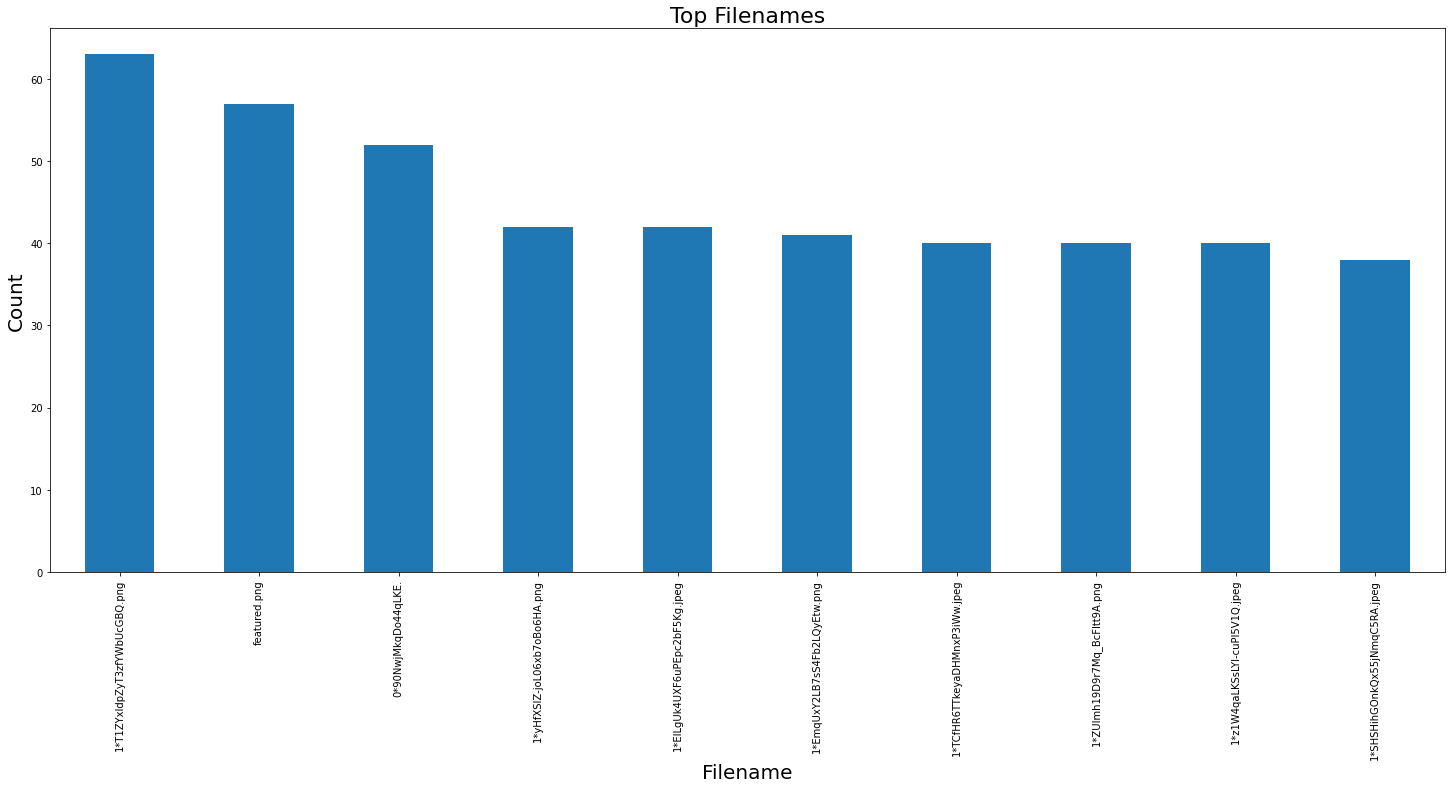

In [ ]:
top_filenames_chart = top_filenames.plot.bar(figsize=(25, 10))

top_filenames_chart.set_title("Top Filenames", fontsize=22)
top_filenames_chart.set_xlabel("Filename", fontsize=20)
top_filenames_chart.set_ylabel("Count", fontsize=20)

Now let's setup [Altair](https://altair-viz.github.io/), and plot the data with Altair. Altair is useful for creating vizualizations since they can be easily exported as a PNG or SVG.

In [ ]:
import altair as alt

In [ ]:
top_filenames_altair = (
    images["filename"]
    .value_counts()
    .head(10)
    .rename_axis("Filename")
    .reset_index(name="Count")
)

filenames_bar = (
    alt.Chart(top_filenames_altair)
    .mark_bar()
    .encode(x=alt.X("Filename:O", sort="-y"), y=alt.Y("Count:Q"))
)

filenames_rule = (
    alt.Chart(top_filenames_altair).mark_rule(color="red").encode(y="mean(Count):Q")
)


filenames_text = filenames_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(filenames_bar + filenames_rule + filenames_text).properties(
    width=1400, height=700, title="Top Filenames"
)

alt.LayerChart(...)

### How about a file format distribution?

What _kind_ of image files are present? We can discover this by checking their "media type", or [MIME type](https://en.wikipedia.org/wiki/Media_type). 






In [ ]:
image_mime_types = (
    images["mime_type_tika"]
    .value_counts()
    .head(5)
    .rename_axis("MIME Type")
    .reset_index(name="Count")
)

image_mimes_bar = (
    alt.Chart(image_mime_types)
    .mark_bar()
    .encode(x=alt.X("MIME Type:O", sort="-y"), y=alt.Y("Count:Q"))
)

image_mime_rule = (
    alt.Chart(image_mime_types).mark_rule(color="red").encode(y="mean(Count):Q")
)

image_mime_text = image_mimes_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(image_mimes_bar + image_mime_rule + image_mime_text).properties(
    width=1400, height=700, title="Image File Format Distribution"
)

alt.LayerChart(...)

### How do I get the actual images?

...or, how do I get to the actual binary files described by each file format information derivative?

There are a few options!

1. `wget` or `curl` from the live URL, or a replay URL
  * Live web URL
    * `wget` or `curl` the value of the `url` column
  * Replay web URL
    * `wget` or `curl` the value of the `crawl_date` and `url` column using the following pattern:
      * `https://web.archive.org/web/` + `crawl_date` + `/` + `url`
        * https://web.archive.org/web/20120119124734/http://www.archive.org/images/glogo.png
      * `http://wayback.archive-it.org/14462/` + `crawl_date` + `/` + `url`
        * https://wayback.archive-it.org/14462/20210524212740/https://ruebot.net/visualization/elxn42/featured_hu33a17dfb90e2c5ed77f783db14a6e53a_5126291_550x0_resize_q90_box_2.png
2. Use a scripting language, such as Python
  * Make use of the `url` and `filename` columns (and `crawl_date` if you want to use the replay URL)
  * `import requests`
  * `requests.get(url, allow_redirects=True)`
  * `open('filename', 'wb').write(r.content)`
3. Use the [Archives Unleashed Toolkit](https://aut.docs.archivesunleashed.org/docs/extract-binary) (if you have access to the W/ARC files).

If you wanted to download the images using the replay URL, below a method for doing so.

First, you'll want to setup a replay url base url. Here we'll use the Archive-It Wayback instance for the collection.

In [ ]:
wayback_url = 'http://wayback.archive-it.org/14462/'

You also might want to do some filtering. This could be by domain, URL pattern, crawl_date, or just getting rid of small images. 

This example of filtering just removes images less than 250x250.

In [ ]:
df = images.loc[(images['width'] > 250) & (images['height'] > 250)]

Next we'll create a new column using a lambda function. If you're familiar with working in spreadsheets, what we're doing here is basically concatenating some column values together and creating a new column.

In [ ]:
df['replay_url'] = df.apply(lambda row: str(wayback_url + str(row['crawl_date']) + "/" + row['url']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Then we can export that new column we created out to a file, so we can use it with `wget` to download all the images!

In [ ]:
df['replay_url'].to_csv('14462_image_urls.txt', index=False, header=False)

Finally, we can pass the file to `wget` to use as a download list. You can also speed this process up using `xargs` or `parallel`.

In [ ]:
!wget --random-wait -i 14462_image_urls.txt

--2022-08-20 11:33:30--  http://wayback.archive-it.org/14462/20200624234314/https://cs.uwaterloo.ca/~jimmylin/images/lin-fullres-cropped-scaled640.jpg
Resolving wayback.archive-it.org (wayback.archive-it.org)... 207.241.232.8, 207.241.225.8
Connecting to wayback.archive-it.org (wayback.archive-it.org)|207.241.232.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137354 (134K) [image/jpeg]
Saving to: ‘lin-fullres-cropped-scaled640.jpg’

lin-fullres-cropped 100%[===================>] 134.13K   637KB/s    in 0.2s    

2022-08-20 11:33:31 (637 KB/s) - ‘lin-fullres-cropped-scaled640.jpg’ saved [137354/137354]

--2022-08-20 11:33:31--  http://wayback.archive-it.org/14462/20200624234441/https://cs.uwaterloo.ca/~jimmylin/theme/light.gif
Reusing existing connection to wayback.archive-it.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 39667 (39K) [image/gif]
Saving to: ‘light.gif’

light.gif           100%[===================>]  38.74K  --.-KB/s    in 0s  